In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Supervised Learning: Classification

## Reading and investigating the data

In [5]:
data = pd.read_csv('bankdata.csv')

In [6]:
data.shape

(74364, 9)

In [7]:
data.dtypes

type             object
operation        object
amount_total    float64
balance         float64
k_symbol         object
amount_left       int64
duration          int64
payments        float64
status           object
dtype: object

In [8]:
data.head()

,type,operation,amount_total,balance,k_symbol,amount_left,duration,payments,status
0,PRIJEM,prevod,44749.0,45549.0,unknown,79608,24,3317.0,A
1,PRIJEM,vklad,1000.0,1000.0,unknown,52788,12,4399.0,A
2,PRIJEM,vklad,1100.0,1100.0,unknown,21924,36,609.0,A
3,PRIJEM,vklad,700.0,700.0,unknown,23052,12,1921.0,A
4,PRIJEM,vklad,900.0,900.0,unknown,41904,12,3492.0,A


In [9]:
data['status'].value_counts()

A    64599
B     9765
Name: status, dtype: int64

### Investigating the numerical variables

In [10]:
data.describe()

,amount_total,balance,amount_left,duration,payments
count,74364.000000,74364.000000,74364.000000,74364.000000,74364.000000
mean,7832.649125,46022.153061,102745.132645,23.942230,4356.580832
std,11729.040391,25439.948570,74749.275498,12.155783,2205.840892
min,0.000000,-14137.200000,4980.000000,12.000000,319.000000
25%,144.300000,27675.125000,46320.000000,12.000000,2569.000000
50%,3000.000000,40965.150000,86184.000000,24.000000,4051.000000
75%,9868.500000,60098.550000,140400.000000,36.000000,6315.000000
max,87300.000000,193910.000000,464520.000000,60.000000,9736.000000


#### Investigating variable duration

In [11]:
data['duration'].value_counts()

12    28761
24    25155
36    14110
48     4721
60     1617
Name: duration, dtype: int64

In [12]:
# we will convert this to a categorical
data['duration'] = data['duration'].apply(str)

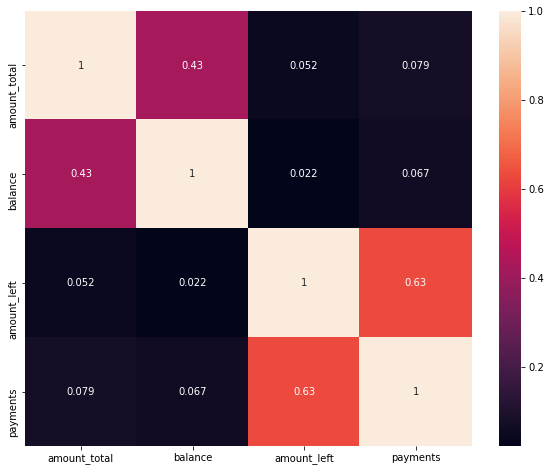

In [13]:
# Checking for multicollinearity
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

payments and amount_left have a rather high correlation, so we will include only one of them in the model

C:\Users\cnr\.conda\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


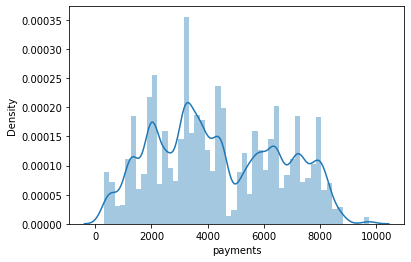

In [14]:
#sns.distplot(data['amount_total'])
#plt.show()

#sns.distplot(data['balance'])
#plt.show()

sns.distplot(data['payments'])
plt.show()

### Preprocessing the numerical variables

In [15]:
from sklearn.preprocessing import StandardScaler
data_num = data.select_dtypes(include = np.number).drop(columns = 'amount_left')
print(data_num.head())
# Standardizing data
transformer = StandardScaler().fit(data_num)
data_num_standardized = transformer.transform(data_num)
x = pd.DataFrame(data_num_standardized, columns = data_num.columns)
print(x.head())

   amount_total  balance  payments
0       44749.0  45549.0    3317.0
1        1000.0   1000.0    4399.0
2        1100.0   1100.0     609.0
3         700.0    700.0    1921.0
4         900.0    900.0    3492.0
   amount_total   balance  payments
0      3.147453 -0.018599 -0.471289
1     -0.582545 -1.769754  0.019231
2     -0.574019 -1.765823 -1.698947
3     -0.608123 -1.781547 -1.104158
4     -0.591071 -1.773685 -0.391953


C:\Users\cnr\.conda\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


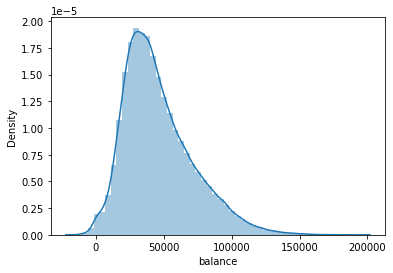

In [16]:
sns.distplot(data['balance'])
plt.show()

C:\Users\cnr\.conda\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


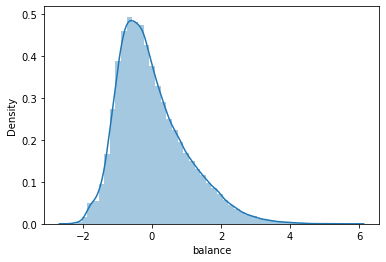

In [17]:
sns.distplot(x['balance'])
plt.show()

### Getting dummies for the categorical variables

In [18]:
from sklearn.preprocessing import OneHotEncoder
cat = data.select_dtypes(include = np.object).drop(columns = 'status')
enc = OneHotEncoder()
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
categorical.head()

,x0_PRIJEM,x0_VYBER,x0_VYDAJ,x1_prevod,x1_unknown,x1_vklad,x1_vyber,x2_pojistne,x2_sankc. urok,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_12,x3_24,x3_36,x3_48,x3_60
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
categorical.sum(axis = 1)

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
74359    4.0
74360    4.0
74361    4.0
74362    4.0
74363    4.0
Length: 74364, dtype: float64

In [20]:
y = data['status']
X = pd.concat((x, categorical), axis=1)
X.head()

,amount_total,balance,payments,x0_PRIJEM,x0_VYBER,x0_VYDAJ,x1_prevod,x1_unknown,x1_vklad,x1_vyber,...,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_12,x3_24,x3_36,x3_48,x3_60
0,3.147453,-0.018599,-0.471289,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.582545,-1.769754,0.019231,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.574019,-1.765823,-1.698947,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.608123,-1.781547,-1.104158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.591071,-1.773685,-0.391953,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
X.isna().sum()

amount_total      0
balance           0
payments          0
x0_PRIJEM         0
x0_VYBER          0
x0_VYDAJ          0
x1_prevod         0
x1_unknown        0
x1_vklad          0
x1_vyber          0
x2_pojistne       0
x2_sankc. urok    0
x2_sipo           0
x2_sluzby         0
x2_unknown        0
x2_urok           0
x2_uver           0
x3_12             0
x3_24             0
x3_36             0
x3_48             0
x3_60             0
dtype: int64

#### Splitting into train and test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression(max_iter = 500).fit(X_train, y_train)

In [23]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8806226047199623

In [24]:
y_test.value_counts()

A    25839
B     3907
Name: status, dtype: int64

In [25]:
pd.Series(predictions).value_counts()

A    29118
B      628
dtype: int64

What happened in terms of the classes?

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [27]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.9948900692530088

In [28]:
pd.Series(predictions).value_counts()

A    25807
B     3939
dtype: int64

In [29]:
decisiontree.feature_importances_

array([1.43522743e-02, 1.24280819e-01, 6.60708337e-01, 1.32679732e-03,
       5.84855729e-04, 2.32896616e-04, 2.18862787e-03, 6.91255759e-04,
       1.42976142e-03, 6.12973175e-04, 4.77936035e-04, 0.00000000e+00,
       5.19590488e-04, 0.00000000e+00, 5.24017385e-04, 0.00000000e+00,
       0.00000000e+00, 8.05002628e-02, 6.95774202e-02, 1.45125491e-02,
       9.69774718e-03, 1.77818787e-02])

In [30]:
print(dict(zip(X.columns, decisiontree.feature_importances_)))

{'amount_total': 0.014352274309615644, 'balance': 0.12428081901079326, 'payments': 0.6607083369447282, 'x0_PRIJEM': 0.0013267973191928547, 'x0_VYBER': 0.0005848557293973857, 'x0_VYDAJ': 0.0002328966156404733, 'x1_prevod': 0.0021886278685564627, 'x1_unknown': 0.0006912557594491789, 'x1_vklad': 0.001429761415995123, 'x1_vyber': 0.0006129731752824516, 'x2_pojistne': 0.00047793603488584463, 'x2_sankc. urok': 0.0, 'x2_sipo': 0.000519590488138483, 'x2_sluzby': 0.0, 'x2_unknown': 0.0005240173851910653, 'x2_urok': 0.0, 'x2_uver': 0.0, 'x3_12': 0.08050026279092377, 'x3_24': 0.06957742021030842, 'x3_36': 0.014512549070533069, 'x3_48': 0.009697747177566458, 'x3_60': 0.01778187869380181}


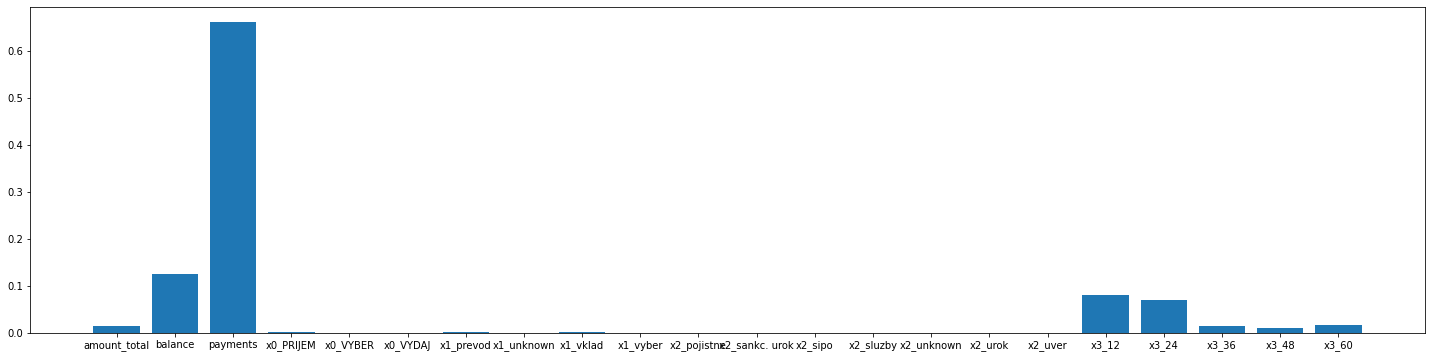

In [31]:
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(height = decisiontree.feature_importances_, x = X.columns)
plt.show()

### SVM

In [36]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
predictions = svm.predict(X_test)
print(svm.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

KeyboardInterrupt: 

### K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
predictions = nearest_neighbors.predict(X_test)
print(nearest_neighbors.score(X_test, y_test))
print(pd.Series(predictions).value_counts())

0.9279567000605123
A    26390
B     3356
dtype: int64


In [35]:
#help(KNeighborsClassifier)

## Supervised Learning: Regression

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# SVR
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

## Model Evaluation

regression metrics

- r-squared
- mean squared error (lower is better)
- root mean squared error

what is the difference and disadvantage of mean squared error to r-squared?

- r-square 0.99 is high, lets say mean squared error is 72 , we dont know if it is good or bad we have to check the scale
- it is not standardized between 0 and 1 thats why it is harder to evaluate

classification metrics

- you can be either correct or wrong either dog or cat
- accuracy score: ratio of total correct predictions to the total number of predictions made
- 100 covid patience, whenever it is not 50/50 but something rare and you got accuracy score 95%, bu yaniltici olabilir cünkü 5 tane hasta kacirdik aslinda ama score yüksek gibi görünüyor. Bu yüzden "confusion matrix" yapmamiz lazim. False negative umrumuzda olur. Insanlara covid olmadigini söylüyorsun ama aslinda covidler bu False Negative

### Creating the Confusion Matrix

In [37]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression(max_iter = 500).fit(X_train, y_train)

In [38]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8806226047199623

In [39]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[25703   136]
 [ 3415   492]]


<AxesSubplot:>

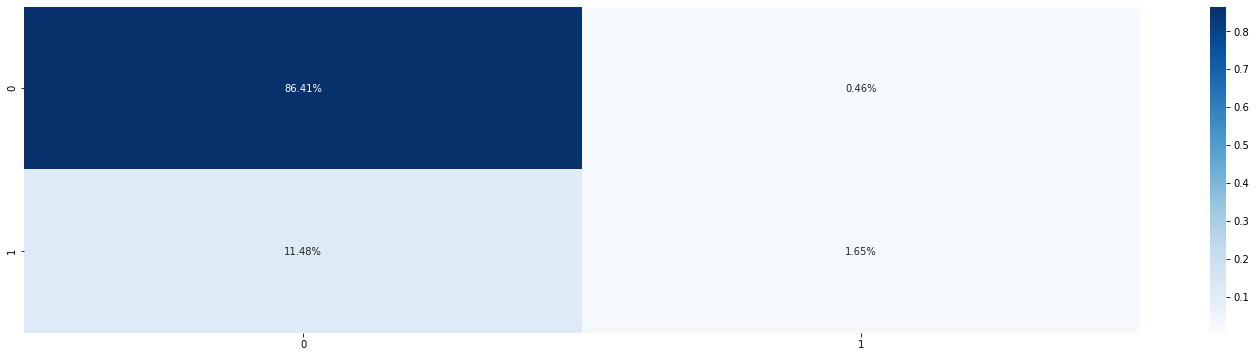

In [40]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [41]:
#false negative ve false positive düsük olsun istiyoruz yani 1-0 ve 0-1

#### Precision, Recall and the F1 Score

recall (sensitivity)

- sensitity or true positive rate: ne kadar dogru Covid hastasi buldum

precision (specifity)

- positive predictive value, covid olmayan hastalara covid tanisi koyuyorsun

precision ve recall yüksek olsun istiyoruz, bunlar ratio


F-1 score

- harmonic mean, average of precision and recall

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score
# We need to assign which is the 'positive class'. Here, we are trying to predict whether a customer will run into
# problems repaying their loan. So Status B is the 'positive' class (meaning credit problems = True)
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

0.7834394904458599
0.12592782185820323
0.21697905181918414


In [ ]:
# recall is low: 

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

#### ROC and AUC analysis

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
help(roc_curve)

In [ ]:
# we need to calculate class probabilities!
y_pred_proba = logisticr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='B') 
plt.plot(fpr,tpr)

In [ ]:
help(roc_auc_score)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

### Repeating all the steps for a Decision Tree for comparison:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

In [ ]:
balanced_accuracy_score(y_test, predictions)

In [ ]:
y_pred_proba = decisiontree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='B') 
# we need to assign which one is the "positive" (1) category
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

### Hyperparameter Tuning

Can we do even better?

In [ ]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
param_grid_rf = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [3, 10, None]}

tune_rf = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid_rf,
                       cv=3)

tune_rf.fit(X_train, y_train)

In [ ]:
tune_rf.best_params_

In [ ]:
decisiontree_opt = DecisionTreeClassifier(**tune_rf.best_params_).fit(X_train, y_train)

In [ ]:
predictions = decisiontree_opt.predict(X_test)
decisiontree_opt.score(X_test, y_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

In [ ]:
balanced_accuracy_score(y_test, predictions)

### Cross Validation

Is our split into training and test set biased?

In [ ]:
from sklearn.model_selection import cross_validate
help(cross_validate)

In [ ]:
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy")

In [ ]:
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy")["test_score"].mean()